# 1.7.1 Camera Calibration

In [25]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [26]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [27]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

In [28]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('.\Image\*.png') #('.\Image\*.png')이미지 파일에서 긁어옴. 

In [29]:
len(images)#갯수가 26개 

26

In [32]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6), None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#cv2.imshow('img',img)

NameError: name 'img' is not defined

## Calibration

In [34]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [35]:
mtx #카메라 파라미터

array([[966.17437116,   0.        , 617.87406992],
       [  0.        , 972.72476514, 381.54932452],
       [  0.        ,   0.        ,   1.        ]])

In [36]:
dist #레디알디스토션

array([[ 0.00437064, -0.3074081 ,  0.00117852,  0.00591307,  0.5605232 ]])

In [37]:
print(rvecs)#벡터

(array([[-0.27980113],
       [ 0.01199061],
       [-0.02898601]]), array([[-0.2271163 ],
       [-0.23722211],
       [-0.01472641]]), array([[-0.2749734 ],
       [-0.51285007],
       [ 0.01059443]]), array([[ 0.22493441],
       [-0.55015584],
       [-3.031977  ]]), array([[-0.20930923],
       [-0.27975235],
       [ 0.00339191]]), array([[-0.21691766],
       [ 0.08518302],
       [ 0.02535186]]), array([[-0.01885754],
       [ 0.4113145 ],
       [-3.08480782]]), array([[-0.3687744 ],
       [-0.43884455],
       [ 3.03339765]]), array([[ 0.00558336],
       [ 0.37652924],
       [-3.10008717]]), array([[-0.52337464],
       [ 0.2203439 ],
       [-3.01275682]]), array([[-0.0380011 ],
       [ 0.25039389],
       [ 3.13128532]]), array([[-0.30326028],
       [-0.34010618],
       [-3.05970822]]), array([[-0.27980113],
       [ 0.01199061],
       [-0.02898601]]), array([[-0.2271163 ],
       [-0.23722211],
       [-0.01472641]]), array([[-0.2749734 ],
       [-0.51285007],
   

In [38]:
tvecs #카메라를  ㅕㅜ얀색샤ㅐㅜ gkf tndlTrp 

(array([[-3.38265298],
        [-0.72061531],
        [22.52222378]]),
 array([[-5.48334921],
        [-0.45884546],
        [21.73736064]]),
 array([[-7.90877537],
        [-0.13977748],
        [20.74887255]]),
 array([[-0.88965114],
        [ 5.31568803],
        [18.43969939]]),
 array([[-5.07212913],
        [-0.85241062],
        [19.23056091]]),
 array([[-3.63663088],
        [-0.66944704],
        [23.35507614]]),
 array([[ 1.93026449],
        [ 5.08676693],
        [18.02087296]]),
 array([[ 1.85393462],
        [ 4.54405642],
        [18.76887464]]),
 array([[ 2.17122663],
        [ 5.0727261 ],
        [17.64772208]]),
 array([[ 2.5282051 ],
        [ 5.13816925],
        [17.00498747]]),
 array([[-2.20623184],
        [ 5.25634039],
        [18.09877564]]),
 array([[ 4.70527515],
        [ 6.17718314],
        [17.97796587]]),
 array([[-3.38265298],
        [-0.72061531],
        [22.52222378]]),
 array([[-5.48334921],
        [-0.45884546],
        [21.73736064]]),
 array

## Undistortion

In [39]:
img = cv2.imread('./Image/image50.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## 1. Using cv2.undistort()

In [40]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

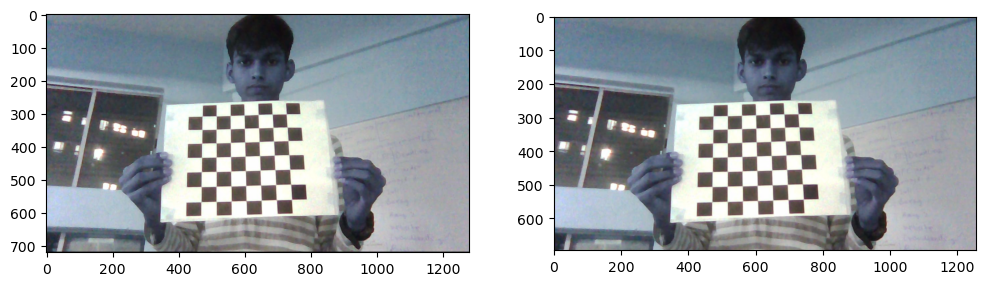

In [41]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [42]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

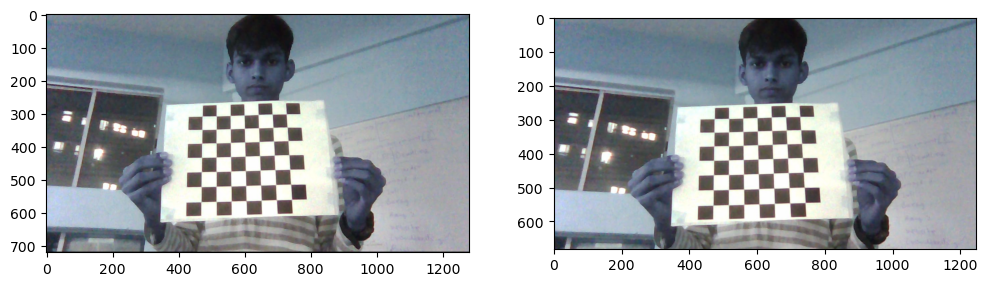

In [43]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [44]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.08954696808535781
